In [2]:
# Install Kaggle and TensorFlow dependencies
!pip install -q kaggle
!pip install -q tensorflow

# Upload your kaggle.json file
from google.colab import files
files.upload()  # Upload kaggle.json here

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"glorymanvitha","key":"16f01b70bc4c2dd8f7ddf5f30b6c918a"}'}

In [3]:
# Setup Kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d paultimothymooney/blood-cells
!unzip -q blood-cells.zip -d blood_cells


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/blood-cells
License(s): other
  0% 0.00/108M [00:00<?, ?B/s]
100% 108M/108M [00:00<00:00, 1.31GB/s]


In [12]:
# Set image paths
train_dir = "/content/blood_cells/dataset2-master/dataset2-master/images/TRAIN"
val_dir = "/content/blood_cells/dataset2-master/dataset2-master/images/TEST"    # Using TEST as validation
test_dir = "/content/blood_cells/dataset2-master/dataset2-master/images/TEST"  # Final test set

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [14]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = test_val_datagen.flow_from_directory(
    val_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_val_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 9957 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


In [15]:
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("Blood Cell.h5", monitor='val_accuracy', save_best_only=True)

In [17]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[early_stop, model_checkpoint]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 590ms/step - accuracy: 0.7560 - loss: 0.5697

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


312/312 ━━━━━━━━━━━━━━━━━━━━ 261s 644ms/step - accuracy: 0.7564 - loss: 0.5688 - val_accuracy: 0.2505 - val_loss: 1.5444
Epoch 2/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.9727 - loss: 0.0789

312/312 ━━━━━━━━━━━━━━━━━━━━ 174s 557ms/step - accuracy: 0.9727 - loss: 0.0789 - val_accuracy: 0.3044 - val_loss: 1.4349
Epoch 3/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.9880 - loss: 0.0387

312/312 ━━━━━━━━━━━━━━━━━━━━ 174s 557ms/step - accuracy: 0.9880 - loss: 0.0387 - val_accuracy: 0.7254 - val_loss: 1.1506
Epoch 4/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 0.9850 - loss: 0.0394

312/312 ━━━━━━━━━━━━━━━━━━━━ 174s 557ms/step - accuracy: 0.9850 - loss: 0.0394 - val_accuracy: 0.8484 - val_loss: 0.5617
Epoch 5/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.9944 - loss: 0.0211

312/312 ━━━━━━━━━━━━━━━━━━━━ 176s 564ms/step - accuracy: 0.9944 - loss: 0.0211 - val_accuracy: 0.8569 - val_loss: 0.7564
Epoch 6/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 521ms/step - accuracy: 0.9901 - loss: 0.0306

312/312 ━━━━━━━━━━━━━━━━━━━━ 176s 564ms/step - accuracy: 0.9901 - loss: 0.0307 - val_accuracy: 0.8725 - val_loss: 0.5432
Epoch 7/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 170s 542ms/step - accuracy: 0.9916 - loss: 0.0294 - val_accuracy: 0.7463 - val_loss: 2.2219
Epoch 8/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 170s 544ms/step - accuracy: 0.9871 - loss: 0.0414 - val_accuracy: 0.7435 - val_loss: 1.9002
Epoch 9/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 170s 544ms/step - accuracy: 0.9911 - loss: 0.0254 - val_accuracy: 0.8713 - val_loss: 0.9134
Epoch 10/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 171s 546ms/step - accuracy: 0.9959 - loss: 0.0126 - val_accuracy: 0.8552 - val_loss: 1.0741


In [19]:
model.load_weights("Blood Cell.h5")
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy * 100:.2f}%")

78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.8988 - loss: 0.4285
Test Loss: 0.5432, Test Accuracy: 87.25%


78/78 ━━━━━━━━━━━━━━━━━━━━ 21s 137ms/step


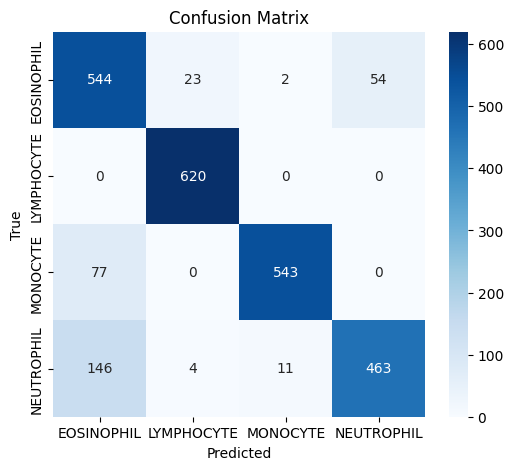

              precision    recall  f1-score   support

  EOSINOPHIL       0.71      0.87      0.78       623
  LYMPHOCYTE       0.96      1.00      0.98       620
    MONOCYTE       0.98      0.88      0.92       620
  NEUTROPHIL       0.90      0.74      0.81       624

    accuracy                           0.87      2487
   macro avg       0.88      0.87      0.87      2487
weighted avg       0.88      0.87      0.87      2487



In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=1)
labels = list(test_generator.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(y_true, y_pred, target_names=labels))